<a href="https://colab.research.google.com/github/khimanshu138/Data-Analysis-with-Python/blob/Sales_Data/Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sales_data = pd.read_csv('https://raw.githubusercontent.com/khimanshu138/Data-Analysis-with-Python/Sales_Data/Sales_data.csv', parse_dates=['Date'])
sales_data

##Basic analysis

In [12]:
sales_data.head()
sales_data.info()
sales_data.describe()
sales_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

(113036, 18)

##Create Few calculaed Fields

In [ ]:
sales_data['Cost_price'] = sales_data['Order_Quantity'] * sales_data['Unit_Cost']
sales_data['selling_price'] = sales_data['Order_Quantity'] * sales_data['Unit_Price']
sales_data.head()

In [18]:
age_cat = sales_data['Age_Group'].value_counts()
age_cat

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

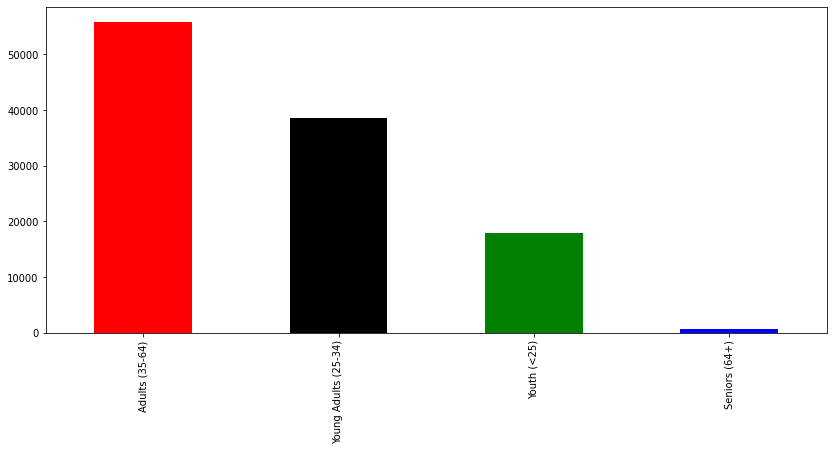

In [22]:
age_cat.plot(kind='bar',color=['red','black','green','blue'], figsize=(14,6))

In [32]:
correlation = sales_data.corr()
correlation

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Cost_price,selling_price
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853,0.003329,0.003970
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673,-0.215604,-0.209921
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326,-0.016013,-0.012505
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895,-0.340382,-0.314561
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865,0.829869,0.820789
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522,0.826301,0.821468
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572,0.902233,0.932886
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758,1.000000,0.993769
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000,0.988758,0.995175
Cost_price,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758,1.000000,0.993769


([<matplotlib.axis.YTick at 0x7f26c6129190>,
 [Text(0, 0, 'Day'),
  Text(0, 0, 'Year'),
  Text(0, 0, 'Customer_Age'),
  Text(0, 0, 'Order_Quantity'),
  Text(0, 0, 'Unit_Cost'),
  Text(0, 0, 'Unit_Price'),
  Text(0, 0, 'Profit'),
  Text(0, 0, 'Cost'),
  Text(0, 0, 'Revenue'),
  Text(0, 0, 'Cost_price'),
  Text(0, 0, 'selling_price')])

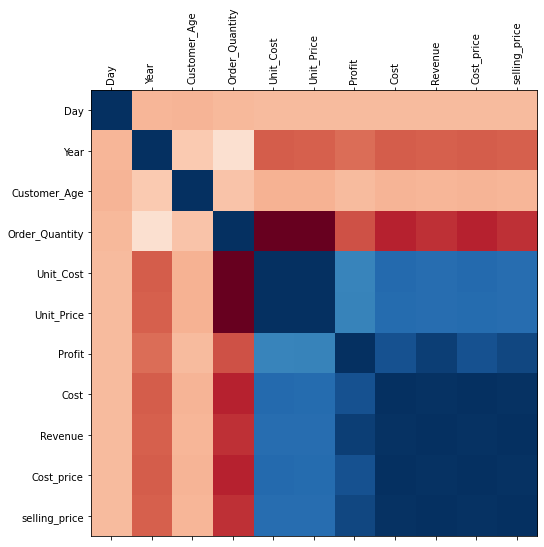

In [33]:
fig=plt.figure(figsize=(14,8))
plt.matshow(correlation,cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(correlation.columns)),correlation.columns,rotation='vertical')
plt.yticks(range(len(correlation.columns)),correlation.columns)

In [57]:
set1 = sales_data.loc[(sales_data['Age_Group']=='Adults (35-64)') & (sales_data['Country']=='Canada')]
set1['Product_Category'].value_counts()
set1.groupby(['State', 'Product_Category','Sub_Category']).size().reset_index(name='Number of Records')

,State,Product_Category,Sub_Category,Number of Records
0,Alberta,Accessories,Bike Racks,2
1,Alberta,Accessories,Bottles and Cages,8
2,Alberta,Accessories,Helmets,2
3,Alberta,Accessories,Tires and Tubes,10
4,Alberta,Bikes,Road Bikes,4
5,Alberta,Bikes,Touring Bikes,2
6,Alberta,Clothing,Caps,2
7,Alberta,Clothing,Gloves,2
8,British Columbia,Accessories,Bike Racks,56
9,British Columbia,Accessories,Bike Stands,30
